# Advanced Business Analytics (CIS442D)

## Homework Assignment 4
### Due date: 2/9/2017 23:55
### Submission Instructions
1. Each student should submit an individual homework assignment.
2. Discussing solutions with others is allowed.
3. Copying solutions is prohibited.
4. Late submissions will not be accepted.
5. Write your solutions in Jupyter IPython notebooks. Use markdown cells to format your document. Your solutions should be replicable, as it will be executed on the grader's computer.
6. Solution files should be uploaded to Blackboard.
---

# Exercise 1
Based on exercise 7 in Chapter 9 in "An Introduction to Statistical Learning, with applications in R"  by G. James, D. Witten,  T. Hastie and R. Tibshirani (<a href="http://www-bcf.usc.edu/~gareth/ISL/">Download</a>)

In this problem, you will use various classification algorithms in order to
predict whether a given car gets high or low gas mileage based on the data in the file 'Auto.csv'.
1. Create a binary variable that takes on a 1 for cars with gas
mileage above the median, and a 0 for cars with gas mileage
below the median.
2. Fit a support vector classifier to the data with various values
of the parameter C, in order to predict whether a car gets high or low gas
mileage. Report the cross-validation errors associated with different
values of this parameter. Comment on your results. (see <a href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC">LinearSVC</a>)
3. Fit a classification tree to the data with various values
of the parameters max_depth and min_samples_leaf, in order to predict whether a car gets high or low gas
mileage. Report the cross-validation errors associated with different
values of thes parametere. Comment on your results. (see <a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier">DecisionTreeClassifier</a>)
4. Fit a random forest to the data with various values
of the parameters tree depth, number of estimators, and maximal featuers, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different
values of thes parameters. (see <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">RandomForestClassifier</a>)
5. Make some plots to back up your assertions in (2)-(4).

In [102]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import pydot_ng as pydot # visualization of trees (among many others)
%matplotlib inline

from sklearn import tree
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from IPython.display import Image # displaying images files in jupyter
from IPython.display import IFrame # displaying pdf file in jupyter


# Load Auto.csv
df = pd.read_csv("Auto.csv")

# Create a binary variable that takes on a 1 for cars with gas mileage above the median, 
# and a 0 for cars with gas mileage below the median.
median = np.median(df["mpg"])
gas_mileage = []

for row in df['mpg']:
    if(row > median):
         gas_mileage.append(1)
    else:
         gas_mileage.append(0)
            

df['gas_mileage'] = gas_mileage
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,gas_mileage
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,0
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,0
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,0
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,0
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,0


In [4]:
# remove the observation that has no value and convert horsepower column to integer
df = df[df.horsepower != '?']
df['horsepower'] = df.loc[:,'horsepower'].astype(str).astype(int)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,gas_mileage
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,0
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,0
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,0
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,0
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,0


In [16]:
# import cross validation
from sklearn.cross_validation import cross_val_score
# define independent variable and dependent variable
X=df[['cylinders','displacement','horsepower','weight','acceleration','year','origin']]
Y=df['gas_mileage']
results=[]
# run cross-validation with different result value of C
for i in np.logspace(-3, 1, 10):
    clf = svm.SVC(kernel='linear',C=i)  
    scores = cross_val_score(clf, X, Y, cv=5)
    results.append([i,scores.mean(), scores.std()])
# Mean accuracy and standard deviation for different c
df_accuracy = pd.DataFrame(data=results,columns=['C','mean','std'])
df_accuracy

# According to the table below, when parameter C equals to 0.001, the SVM prediction model generate the highest mean 
# accuracy and lowest standard deviation. Even though Lower values of C lead less penlization of wrong side point
# Using which model is really depends on our purpose for the model since different parameter C all
# generate accuracy above 85%. If we really want to emphasize model's in sample prediction performance,
# we can choose C higher than 0.001. However,if our goal is to pursue a higher accuracy, then 0.001 is a good choice.

,C,mean,std
0,0.001000,0.890263,0.019234
1,0.002783,0.875008,0.034359
2,0.007743,0.859916,0.087880
3,0.021544,0.862480,0.090215
4,0.059948,0.857416,0.086543
5,0.166810,0.862512,0.088374
6,0.464159,0.877735,0.069412
7,1.291550,0.864946,0.071425
8,3.593814,0.859883,0.086543
9,10.000000,0.854787,0.092169


In [17]:
# define independent variable and dependent variable
X_labels= ['cylinders','displacement','horsepower','weight','acceleration','year','origin']
X=df[['cylinders','displacement','horsepower','weight','acceleration','year','origin']]
Y=df['gas_mileage']

results = []
# Try different tree depth
for d in range(1,8):
# Try different minimum samples leaf in each node
    for m in range(1,len(df),10):
# Fit the data with decision tree
        clf = tree.DecisionTreeClassifier(max_depth=d,min_samples_leaf=m)
        clf = clf.fit(X,Y)    
        scores = cross_val_score(clf, X, Y, cv=5)
        results.append((d,m,scores.mean(), scores.std()))
# Generate the test accuracy result for different of parameter in regression    
df_tree_accuracy = pd.DataFrame(data=results,columns=['depth','min_leaf','mean','std'])

# Find the best model with its index 
best_index = df_tree_accuracy['mean'].idxmax()
depth = df_tree_accuracy.loc[best_index,'depth']
min_leaf = df_tree_accuracy.loc[best_index,'min_leaf']
min_leaf = int(min_leaf)

# Plot the best decision tree
clf = clf = tree.DecisionTreeClassifier(max_depth=depth, min_samples_leaf = min_leaf)
clf = clf.fit(X,Y)
with open("tree.dot", 'w') as f:
    tree.export_graphviz(clf, out_file=f, feature_names=X_labels, filled=True, class_names=['No','Yes'] ) #clf.classes_
    
pydot.graph_from_dot_file('tree.dot').write_pdf('tree.pdf')

IFrame('tree.pdf', width=900, height=400)

# The optimal decision tree is of depth 1 and min_leaf equals to 1. The depth of 1 illustrate that diaplacement is
# strongly correlated with gas mileage. In this case, we dont't need to worry about large depth of tree will cause the 
# time complexity to become high. We don't need to make trade off between accuracy and efficiency.
# Normally small value of minimum sample leaf will generate a higer accuracy,
# since the small value of sample in each node have less constraint for the nodes.

In [20]:
tree_depth = 1
base_clf = tree.DecisionTreeClassifier(max_depth=tree_depth) # base classifier
results = []
n_range = range(1,10,1)
feature_range = ["auto","sqrt","log2",None]
for n in n_range:
    for f in feature_range:
        for d in range(1,8):
    # random forest classifier with n bootstrapped data sets f max feature and d max depth
            clf_rf = RandomForestClassifier(max_features= f, n_estimators=n, max_depth=d)
            clf_rf_scores = cross_val_score(clf_rf, X, Y, cv=5)
            results.append((n,f,d,clf_rf_scores.mean(),clf_rf_scores.std()))
    
df_rf_accuracy = pd.DataFrame(data=results,columns=['n','f','d','RF accuracy','RF error'])
df_rf_accuracy

best_index = df_rf_accuracy['RF accuracy'].idxmax()
n = df_rf_accuracy.loc[best_index,'n']
f = df_rf_accuracy.loc[best_index,'f']
d = df_rf_accuracy.loc[best_index,'d']

print(n)
print(f)
print(d)

# The result is really dependent on how random forest generate the bootstrapped data from original dataset.
# The optional choice of max features should auto, which mean pick all the features.It will increase the accuracy, since it
# has more features. However, sometime it will leads to over-fitting problem. The number of bootstrap represent how many
# bootsrapped data sets we want. As for depth, same as decision tree before, should be determine by the trade off
# between running time and accuracy.

8
auto
2


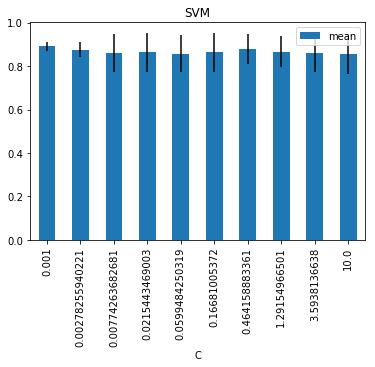

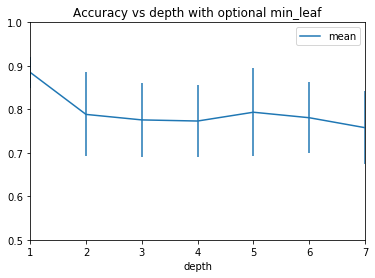

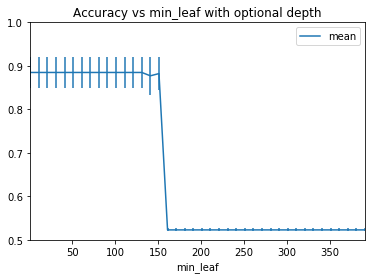

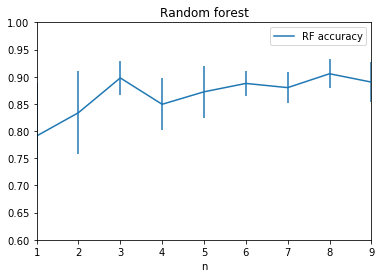

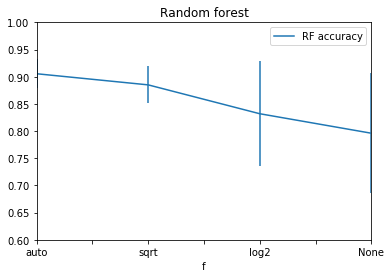

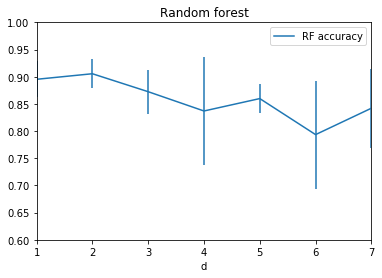

In [35]:
df_accuracy.plot.bar(x='C',y='mean',yerr='std',title='SVM')

df_tree_plot_1 = df_tree_accuracy[df_tree_accuracy['min_leaf']==min_leaf]
df_tree_plot_2 = df_tree_accuracy[df_tree_accuracy['depth']==depth]
df_tree_plot_1.plot(x='depth',y='mean',yerr='std', ylim=[0.5,1],title='Accuracy vs depth with optional min_leaf')
df_tree_plot_2.plot(x='min_leaf',y='mean',yerr='std', ylim=[0.5,1],title='Accuracy vs min_leaf with optional depth')

df_rf_plot_1 = df_rf_accuracy[(df_rf_accuracy['f']==f) & (df_rf_accuracy['d']==d)]
df_rf_plot_2 = df_rf_accuracy[(df_rf_accuracy['n']==n) & (df_rf_accuracy['d']==d)]
df_rf_plot_3 = df_rf_accuracy[(df_rf_accuracy['f']==f) & (df_rf_accuracy['n']==n)]

# All the plot is based on the optimal choice of other two parameter.
df_rf_plot_1.plot(x='n',y='RF accuracy',ylim=[0.6,1],yerr='RF error',title='Random forest accuracy vs number of estimator')
df_rf_plot_2.plot(x='f',y='RF accuracy',ylim=[0.6,1],yerr='RF error',title='Random forest accuracy vs maximal feature')
df_rf_plot_3.plot(x='d',y='RF accuracy',ylim=[0.6,1],yerr='RF error',title='Random forest accuracy vs depth')


# Exercise 2: 
Chapter 8, exercise 1 in "An Introduction to Statistical Learning, with applications in R"  by G. James, D. Witten,  T. Hastie and R. Tibshirani (<a href="http://www-bcf.usc.edu/~gareth/ISL/">Download</a>)


In [ ]:
1. Draw an example (of your own invention) of a partition of two dimensional
feature space that could result from recursive binary
splitting. Your example should contain at least six regions. Draw a
decision tree corresponding to this partition. Be sure to label all aspects
of your figures, including the regions R1, R2,..., the cutpoints
t1, t2,..., and so forth.
Hint: Your result should look something like Figures 8.1 and 8.2.

[ 190.5         119.5          13.64999962   -2.           -2.          132.5
   -2.           -2.           21.60000038   16.95000076   -2.           -2.
   -2.        ]


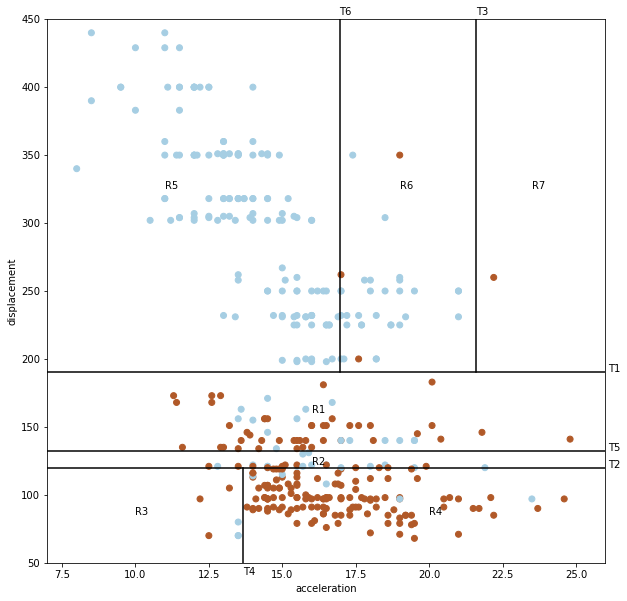

In [164]:
# write solution here
# I choose continue using the auto data
df2  = df.loc[:,['acceleration','displacement','gas_mileage']]


X_labels= ['acceleration','displacement']
X=df2[['acceleration','displacement']]
Y=df2['gas_mileage']

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, Y)
split_feature = clf.tree_.feature
split_threshold = clf.tree_.threshold
result = []
print(threshold)


for i in range(0,len(split_feature)-1):
    if(split_feature[i]>=0):
        result.append((X_labels[split_feature[i]],split_threshold[i]))

df_split = pd.DataFrame(data=result,columns=['feature','threshold'])

fig, ax = plt.subplots()
ax.scatter(df2["acceleration"], df2['displacement'], c=df2['gas_mileage'], cmap=plt.cm.Paired)
ax.set_xlabel('acceleration')
ax.set_ylabel('displacement')
ax.set_xlim([7,26])
ax.set_ylim([50,450])
fig.set_figheight(10)
fig.set_figwidth(10)

ax.plot([7,26],[190.5,190.5],'-k')
ax.text(26.1, 190.5, 'T1')
ax.plot([21.6,21.6],[190.5,450],'-k')
ax.text(21.6, 453, 'T3')
ax.plot([16.95,16.95],[190.5,450],'-k')
ax.text(16.95, 453, 'T6')
ax.plot([7,26],[119.5,119.5],'-k')
ax.text(26.1, 119.5, 'T2')
ax.plot([7,26],[132.5,132.5],'-k')
ax.text(26.1, 132.5, 'T5')
ax.plot([13.65,13.65],[50,119.5],'-k')
ax.text(13.65, 41, 'T4')
ax.text(16, 160, 'R1')
ax.text(16, 122, 'R2')
ax.text(10, 85, 'R3')
ax.text(20, 85, 'R4')
ax.text(11, 325, 'R5')
ax.text(19, 325, 'R6')
ax.text(23.5, 325, 'R7')



with open("tree.dot", 'w') as f:
    tree.export_graphviz(clf, out_file=f, feature_names=X_labels, filled=True, class_names=['No','Yes'] ) #clf.classes_
    
pydot.graph_from_dot_file('tree.dot').write_pdf('tree.pdf')

IFrame('tree.pdf', width=900, height=400)



# Optional coding assignment
This is an __optional__ exercise, which will be graded and counted towards the class participation component of your grade (it could only improve your grade).

Read the first chapter in https://automatetheboringstuff.com/chapter2/ and solve the practice quetsions appearing at the end of the chapter.

In [ ]:
# Solution to Q1
# True and False. 

In [ ]:
# Solution to Q2
# and, or, not

In [ ]:
# Solution to Q3
# True and True is True
# True and False is False
# False and True is False
# False and False is False

# True or True is True
# True or False is True
# False or True is True
# False or False is False

# not True is False
# not False is True

In [170]:
# Solution to Q4
#(5 > 4) and (3 == 5) is False
#not (5 > 4) is False
#(5 > 4) or (3 == 5) is True
#not ((5 > 4) or (3 == 5)) is False
#(True and True) and (True == False) is False
# (not False) or (not True) is Ture

False

In [ ]:
# Solution to Q5

# ==  Equal to

# != Not equal to

# <  Less than

# >  Greater than

# <=  Less than or equal to

# >=  Greater than or equal to



In [ ]:
# Solution to Q6

# the == operator (equal to) has two equal signs, while the = operator (assignment) has just one equal sign.

In [ ]:
# Solution to Q7

# The == operator (equal to) asks whether two values are the same as each other.

# The = operator (assignment) puts the value on the right into the variable on the left.

In [ ]:
# Solution to Q8
# The first block of code starts at the line print('egg') and contains all the lines after it. 
# Inside this block is another block 2, which has only a single line in it: print('bacon'). 
# The third block 3 is also one line long: print('ham').


In [175]:
# Solution to Q9
spam = 1
if spam == 1:
    print('Hello')
elif spam == 2:
    print('Howdy')
else:
    print('Greetings')
    

Hello


In [ ]:
# Solution to Q10
# CTRL-C 

In [ ]:
# Solution to Q11
# break statement immediately exits the while loop’s clause.
# Like break statements, continue statements are used inside loops. 
# When the program execution reaches a continue statement, the program execution immediately jumps back 
# to the start of the loop and reevaluates the loop’s condition.

In [179]:
# Solution to Q12
# range(10) results in ten iterations through the clause.
# range(0,10) result in number from 0 to 9
# range(0, 10, 1) will count from zero to nine by intervals of one.

In [185]:
# Solution to Q13
for i in range(10):
    print(i+1)
    
i = 1    
while(i <= 10):
    print(i)
    i=i+1

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


In [ ]:
# Solution to Q14
# from spam import bacon